In [1]:
#%%
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
from scipy import stats


In [2]:

#%%
from load_csv import df
# clear all indexes
df = df.reset_index(drop=True)
# df = df.set_index('Date')



            Infections  Dead  Recover  Infect_by_date  inf_day
Date                                                          
28.03.2020           6     0        0               6      NaN
29.03.2020           6     0        0               6      0.0
30.03.2020           9     1        0               8      3.0
31.03.2020           9     1        0               8      0.0
01.04.2020           9     2        0               7      0.0
['Infections', 'Dead', 'Recover', 'Infect_by_date', 'inf_day']
Date
28.03.2020   2020-03-28
29.03.2020   2020-03-29
30.03.2020   2020-03-30
31.03.2020   2020-03-31
01.04.2020   2020-04-01
                ...    
30.05.2023   2023-05-30
06.06.2023   2023-06-06
13.06.2023   2023-06-13
20.06.2023   2023-06-20
27.06.2023   2023-06-27
Name: Date, Length: 1149, dtype: datetime64[ns]
Date
28.03.2020       0.0
29.03.2020       1.0
30.03.2020       2.0
31.03.2020       3.0
01.04.2020       4.0
               ...  
30.05.2023    1158.0
06.06.2023    1165.0
13.06.

In [13]:

# %%
# https://www.statsmodels.org/dev/examples/notebooks/generated/markov_regression.html
import statsmodels.api as sm
df1 = df[['Date','Infections']]
df1['Inf_day'] = df1['Infections'].diff().fillna(df1['Infections'])
k_reg = 4


C:\Users\Alex\AppData\Local\Temp\ipykernel_31080\1613094674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Inf_day'] = df1['Infections'].diff().fillna(df1['Infections'])


In [14]:

# Fit the model
# (a switching mean is the default of the MarkovRegession model)
# trend 't' is for trend
# trend 'c' is for constant
# trend 'ct' is for constant and trend

# k_regimes is the number of regimes
# k_reg is the number of regimes'

mod = sm.tsa.MarkovRegression(df1['Infections'], k_regimes=k_reg, trend='t')
res = mod.fit()


e:\Alex\anaconda3\envs\med_2023\lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1294: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
e:\Alex\anaconda3\envs\med_2023\lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1294: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
e:\Alex\anaconda3\envs\med_2023\lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1294: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
e:\Alex\anaconda3\envs\med_2023\lib\site-packages\statsmodels\tsa\r

In [15]:

#%%
print(res.summary())


                        Markov Switching Model Results                        
Dep. Variable:             Infections   No. Observations:                 1149
Model:               MarkovRegression   Log Likelihood              -11321.204
Date:                Mon, 17 Jul 2023   AIC                          22676.409
Time:                        02:59:40   BIC                          22762.202
Sample:                             0   HQIC                         22708.796
                               - 1149                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            35.1871      2.867     12.272      0.000      29.567      40.807
                             Regime 1 parameters    

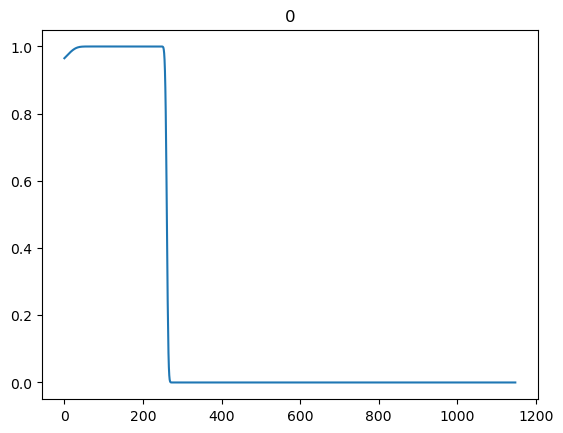

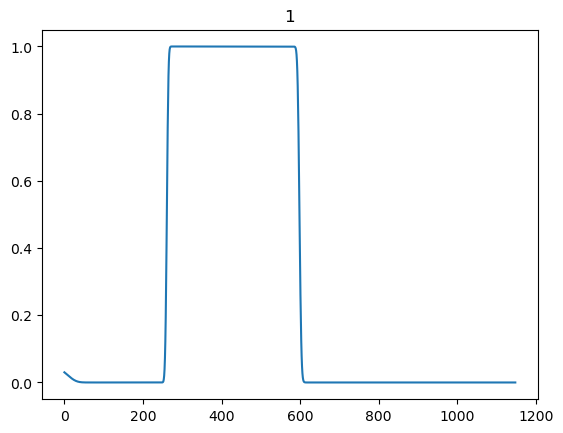

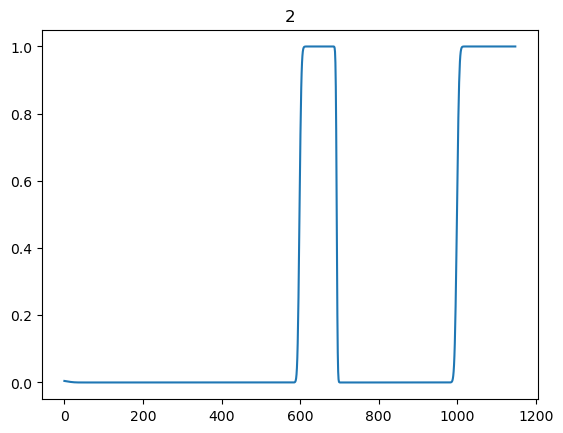

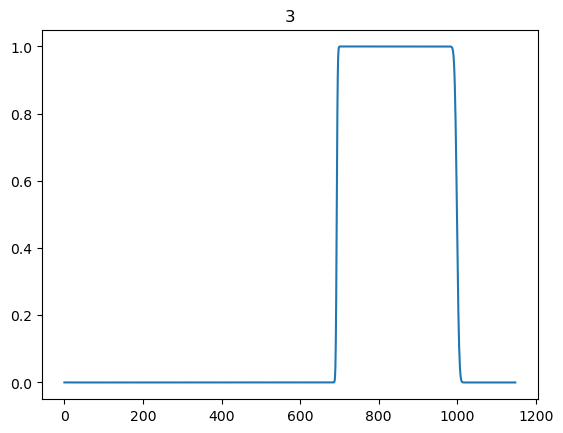

In [16]:

for i in range(k_reg):
    res.smoothed_marginal_probabilities[i].plot(title=f"{i}")
    plt.show()    
 

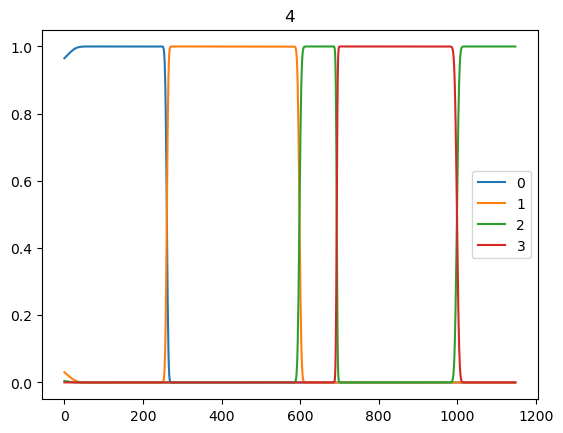

In [17]:
   
for i in range(k_reg):
    res.smoothed_marginal_probabilities[i].plot(title=f"{k_reg}")
plt.legend()
plt.show()


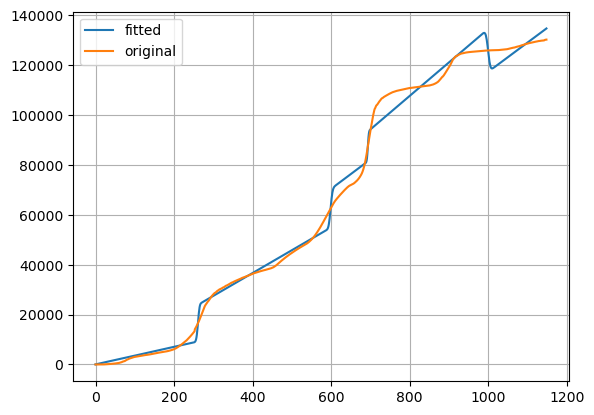

In [18]:

#%%
plt.plot(res.fittedvalues, label='fitted')
plt.plot(df1['Infections'], label='original')
plt.grid()
plt.legend()
plt.show()


In [19]:
res.fittedvalues.to_csv('fittedvalues.csv')
res.resid.to_csv('resid.csv')
res.smoothed_marginal_probabilities.to_csv('regimes.csv')

In [20]:
k_reg = 6

In [21]:

mod1 = sm.tsa.MarkovRegression(df1['Inf_day'], k_regimes=k_reg, trend='ct')
res1 = mod1.fit()


e:\Alex\anaconda3\envs\med_2023\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:


#%%
print(k_reg)
print(res1.summary())


6
                        Markov Switching Model Results                        
Dep. Variable:                Inf_day   No. Observations:                 1149
Model:               MarkovRegression   Log Likelihood               -5912.514
Date:                Mon, 17 Jul 2023   AIC                          11911.028
Time:                        05:27:46   BIC                          12128.034
Sample:                             0   HQIC                         11992.948
                               - 1149                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.7687      2.893     26.532      0.000      71.098      82.440
x1            -0.0435      0.004    -11.352      0

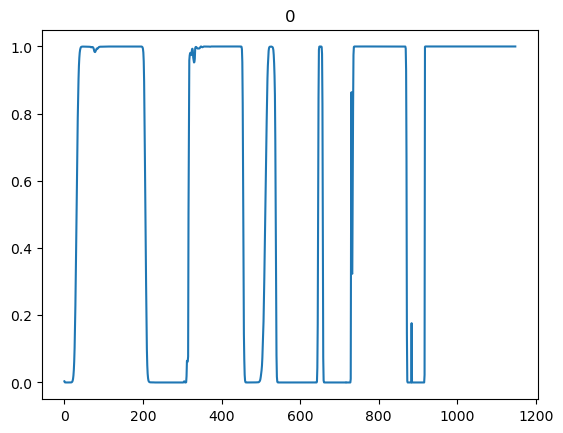

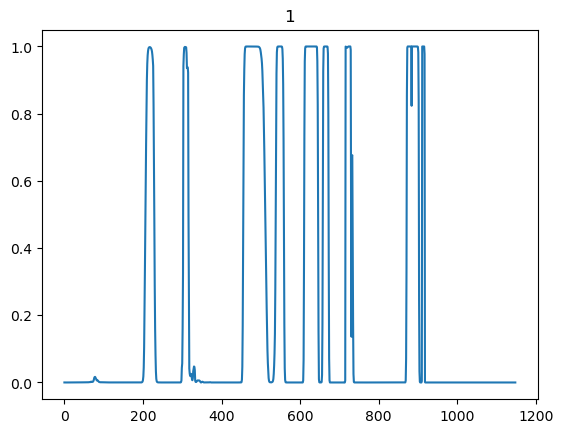

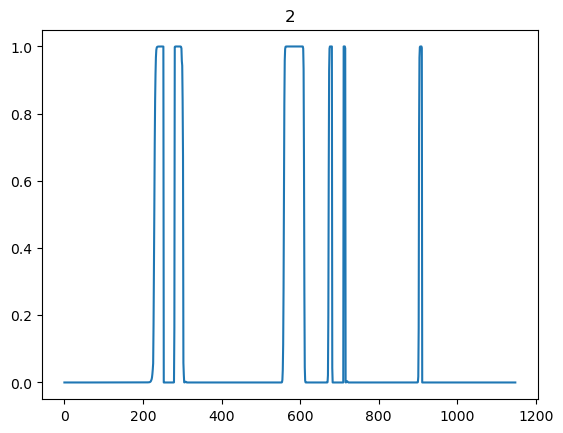

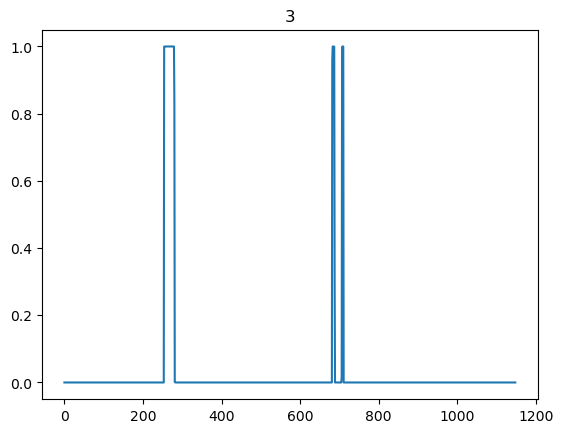

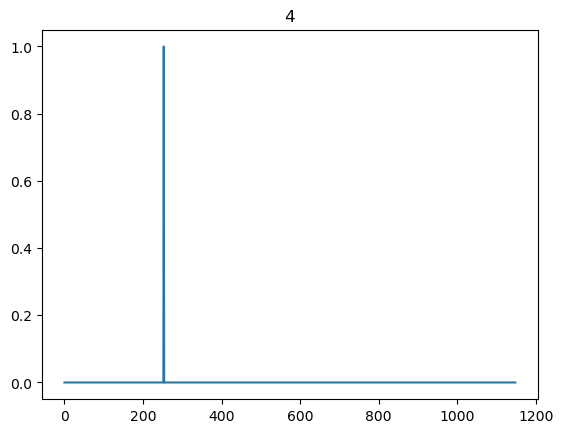

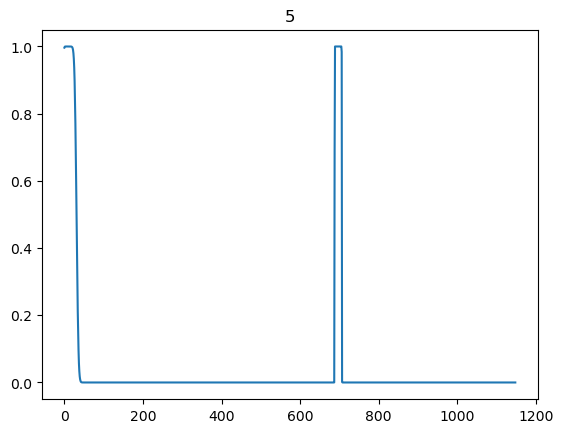

In [23]:

for i in range(k_reg):
    res1.smoothed_marginal_probabilities[i].plot(title=f"{i}")
    plt.show()    
    


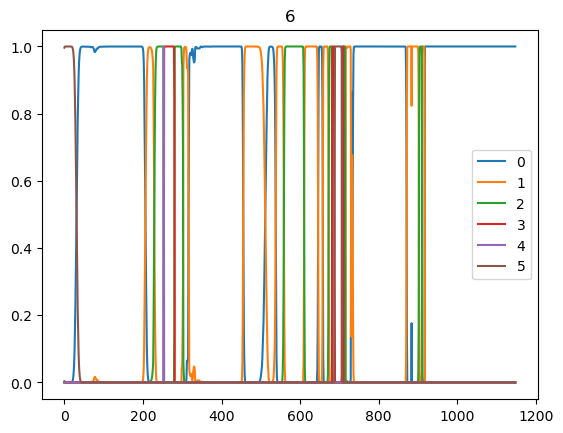

In [24]:
for i in range(k_reg):
    res1.smoothed_marginal_probabilities[i].plot(title=f"{k_reg}")
plt.legend()
plt.show()



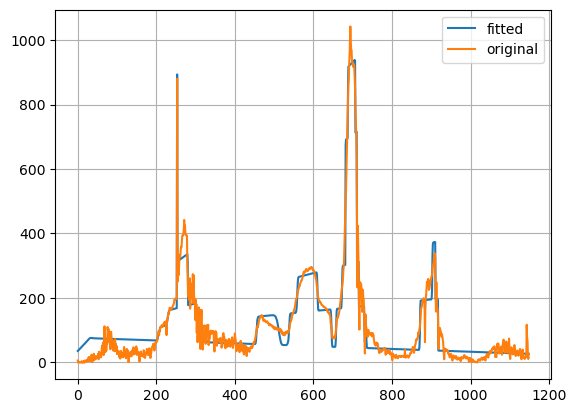

In [25]:
#%%
plt.plot(res1.fittedvalues, label='fitted')
plt.plot(df1['Inf_day'], label='original')
plt.grid()
plt.legend()
plt.show()

In [27]:
res1.fittedvalues.to_csv('fittedvalues1.csv')
res1.resid.to_csv('resid1.csv')
res1.smoothed_marginal_probabilities.to_csv('regimes1.csv')

In [ ]:

# %%
# Fit the model
# (a switching mean is the default of the MarkovRegession model)
k_reg = 7
df1['Inf_day'] = df1['Infections'].diff().fillna(df1['Infections'])


In [ ]:

#%%
mod = sm.tsa.MarkovRegression(df1['Inf_day'], k_regimes=k_reg)
res = mod.fit()


In [ ]:

# %%

print(res.summary())


In [ ]:

for i in range(k_reg):
    res.smoothed_marginal_probabilities[i].plot(title=f"{i}")
    plt.show()    
    


In [ ]:
for i in range(k_reg):
    res.smoothed_marginal_probabilities[i].plot(title=f"{i}")
plt.show()


In [ ]:

plt.plot(res.fittedvalues, label='fitted')
plt.plot(df1['Inf_day'], label='original')
plt.show()



# %%


In [ ]:
# create new dataframe with date , inf_day and res fitted  values
new_df = pd.DataFrame()
new_df["Date"] = df["Date"]
new_df["Inf_day"] = df1["Inf_day"]
new_df["res"] = res.fittedvalues

print(new_df)

In [ ]:
#save to csv file new_df

import pandas as pd
new_df.to_csv('new_df.csv', index=False)